In [5]:
import numpy as np # type: ignore
import pandas as pd # type: ignore
import matplotlib.pyplot as plt # type: ignore
import seaborn as sb # type: ignore
import networkx as nx # type: ignore
import dask.dataframe as dd # type: ignore
from sklearn.model_selection import train_test_split # type: ignore
from sklearn.linear_model import LinearRegression # type: ignore
from sklearn.preprocessing import StandardScaler # type: ignore


data = pd.read_csv("house-price-dataset/MagicBricks.csv")
# Area, BHK, Bathroom, Furnishing, Locality, Parking,  Price, Status, Transaction, Type, Per_Sqft 
print(data.info())
"""
dtypes: float64(4), int64(2), object(5)
memory usage: 108.3+ KB
"""

numerical_cols = ['Area', 'BHK', 'Bathroom', 'Parking', 'Per_Sqft', 'Price']
for col in numerical_cols:
    data[col] = pd.to_numeric(data[col], errors='coerce')
data.dropna(inplace=True)
data['Area'] = data['Area'].astype('Float32')
data['BHK'] = data['BHK'].astype('Int32')
data['Bathroom'] = data['Bathroom'].astype('Float32')
data['Parking'] = data['Parking'].astype('Int32')
data['Price'] = data['Price'].astype('Int32')
data['Per_Sqft'] = data['Per_Sqft'].astype('Float32')

print("Data Shape:", data.shape)
print("Price Range:", data['Price'].min(), "to", data['Price'].max())
data.info()
"""
dtypes: Float32(3), Int32(3), object(5)
memory usage: 76.6+ KB
"""

# numerical_cols = ['Area', 'BHK', 'Bathroom', 'Parking', 'Per_Sqft']
# for col in numerical_cols:
    # data[col] = pd.to_numeric(data[col], errors='coerce')

# data.dropna(inplace=True)
# data.info()
"""
dtypes: float64(4), int64(2), object(5)
memory usage: 94.2+ KB
"""

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Area         1259 non-null   float64
 1   BHK          1259 non-null   int64  
 2   Bathroom     1257 non-null   float64
 3   Furnishing   1254 non-null   object 
 4   Locality     1259 non-null   object 
 5   Parking      1226 non-null   float64
 6   Price        1259 non-null   int64  
 7   Status       1259 non-null   object 
 8   Transaction  1259 non-null   object 
 9   Type         1254 non-null   object 
 10  Per_Sqft     1018 non-null   float64
dtypes: float64(4), int64(2), object(5)
memory usage: 108.3+ KB
None
Data Shape: (1005, 11)
Price Range: 1000000 to 240000000
<class 'pandas.core.frame.DataFrame'>
Index: 1005 entries, 1 to 1258
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Area         1005 non-null   F

'\ndtypes: float64(4), int64(2), object(5)\nmemory usage: 94.2+ KB\n'

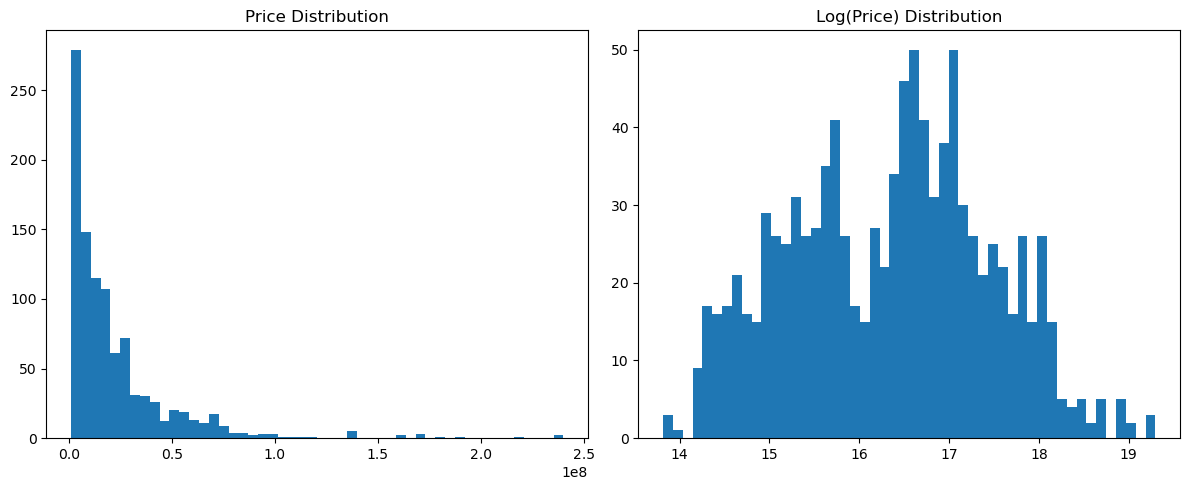

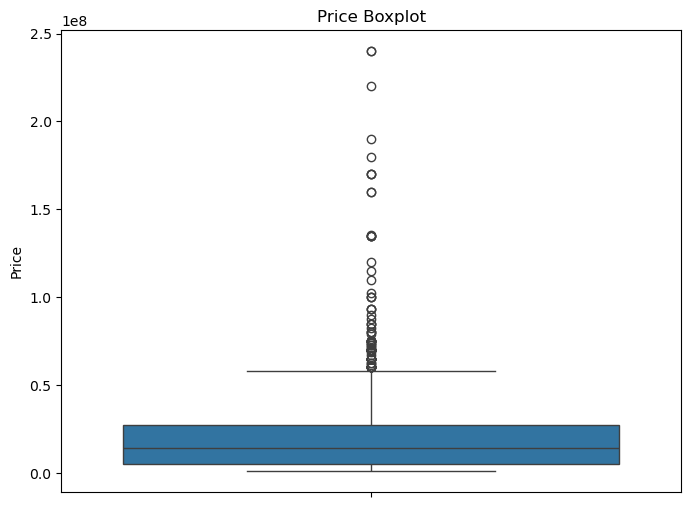

'Feature Statistics:\n'

,Area,BHK,Bathroom,Parking,Per_Sqft,Price
count,1005.0,1005.0,1005.0,1005.0,1005.0,1005.0
mean,1504.302002,2.791045,2.575124,1.697512,15663.630859,22240298.507463
std,1729.104858,0.961469,1.088503,3.223118,21170.160156,27717443.554586
min,28.0,1.0,1.0,1.0,1259.0,1000000.0
25%,770.0,2.0,2.0,1.0,6364.0,5130000.0
50%,1150.0,3.0,2.0,1.0,11363.0,14000000.0
75%,1700.0,3.0,3.0,2.0,18000.0,27000000.0
max,24300.0,7.0,7.0,39.0,183333.0,240000000.0


In [7]:
train_data = data.copy()

# Price histogram (original and log scale)
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.hist(train_data['Price'], bins=50)
plt.title("Price Distribution")
plt.subplot(1, 2, 2)
plt.hist(np.log(train_data['Price'] + 1), bins=50)
plt.title("Log(Price) Distribution")
plt.tight_layout()
plt.show()

# Boxplot for Price
plt.figure(figsize=(8, 6))
sb.boxplot(y=train_data['Price'])
plt.title("Price Boxplot")
plt.show()

# Key feature stats
display("Feature Statistics:\n", train_data[numerical_cols].describe())

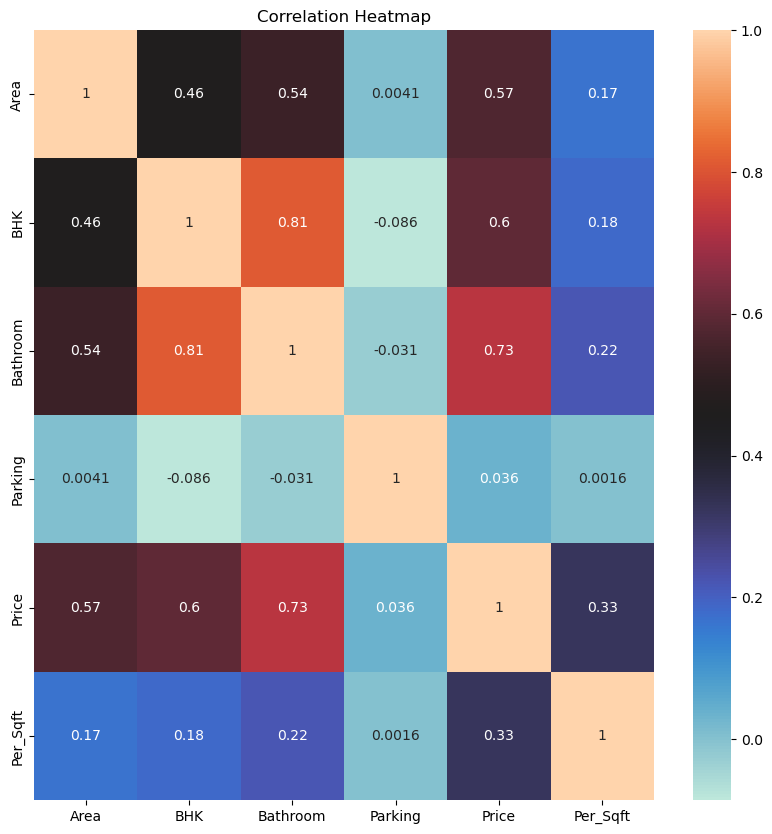

In [8]:
plt.figure(figsize=(10, 10))
sb.heatmap(train_data.select_dtypes(include=['Float32', 'Int32']).corr(), annot=True, cmap="icefire")
plt.title("Correlation Heatmap")
plt.show()

In [9]:
# Simplifying to key features
key_cols = ['Area', 'BHK', 'Bathroom']
X = data[key_cols]
Y = np.log(data['Price'] + 1)  # Log-transforming the target

# Splitting train_data into train and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=50)

In [10]:
# Log transform Area
X_train_encoded = X_train.copy()
X_test_encoded = X_test.copy()
X_train_encoded['Area'] = np.log(X_train_encoded['Area'] + 1)
X_test_encoded['Area'] = np.log(X_test_encoded['Area'] + 1)

In [11]:
print(f"X_train_encoded shape: {X_train_encoded.shape}")
print(f"X_test_encoded shape: {X_test_encoded.shape}")

X_train_encoded shape: (703, 3)
X_test_encoded shape: (302, 3)


In [12]:
# Adding bathroom-to-BHK ratio
X_train_encoded['bathroom_ratio'] = X_train_encoded['Bathroom'] / (X_train_encoded['BHK'] + 1)
X_test_encoded['bathroom_ratio'] = X_test_encoded['Bathroom'] / (X_test_encoded['BHK'] + 1)

In [14]:
print(f"NaN in X_train_encoded: {X_train_encoded.isna().sum()}")
print(f"Infinite in X_train_encoded: {np.isinf(X_train_encoded).sum()}")

NaN in X_train_encoded: Area              0
BHK               0
Bathroom          0
bathroom_ratio    0
dtype: int64
Infinite in X_train_encoded: Area              0
BHK               0
Bathroom          0
bathroom_ratio    0
dtype: Int32


In [15]:
# Scaling features
standard_scaler = StandardScaler()
X_train_scaled = standard_scaler.fit_transform(X_train_encoded)
X_test_scaled = standard_scaler.transform(X_test_encoded)

In [16]:
# Assigning final values to x_train, x_test, y_train, y_test
x_train = X_train_scaled
x_test = X_test_scaled
y_train = Y_train
y_test = Y_test

print(f"x_train shape: {x_train.shape}")
print(f"x_test shape: {x_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

x_train shape: (703, 4)
x_test shape: (302, 4)
y_train shape: (703,)
y_test shape: (302,)


In [17]:
# Model training using Linear Regression
reg = LinearRegression()
reg.fit(x_train, y_train)

LinearRegression()

In [18]:
# Evaluation
score = reg.score(x_test, y_test)
print(f"R squared Score for log(Price): {score}")

R squared Score for log(Price): 0.7023524620678279


In [19]:
y_pred = reg.predict(x_test)
print("Sample predictions (rounded):", np.round(y_pred[:5]))
print("Actual Price values:", y_test.values[:5])

Sample predictions (rounded): [16. 16. 18. 16. 17.]
Actual Price values: <FloatingArray>
[ 16.61887099947687, 15.520258832020865, 18.064005814299346,
 15.607270193858982, 17.182806422433504]
Length: 5, dtype: Float64


In [21]:
print(f"R² Score (train): {reg.score(x_train, y_train)}")
print(f"R² Score (test): {reg.score(x_test, y_test)}")

R² Score (train): 0.7361988994879438
R² Score (test): 0.7023524620678279
